**Performing PCA with SVM on digits dataset and checking prformance with and without PCA**

In [ ]:
#load dataset
from sklearn import datasets
digits = datasets.load_digits()
digits.data.shape

(1797, 64)

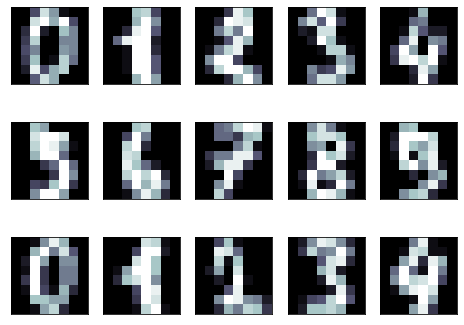

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.bone)

In [ ]:
#splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,
        digits.target, random_state=142)

print(X_train.shape, X_test.shape)

(1347, 64) (450, 64)


In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=50, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

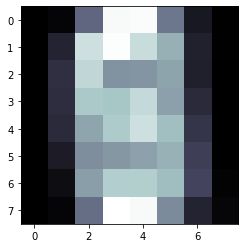

In [ ]:
plt.imshow(pca.mean_.reshape(digits.images[0].shape),
           cmap=plt.cm.bone)

In [ ]:
print(pca.components_.shape)

(50, 64)


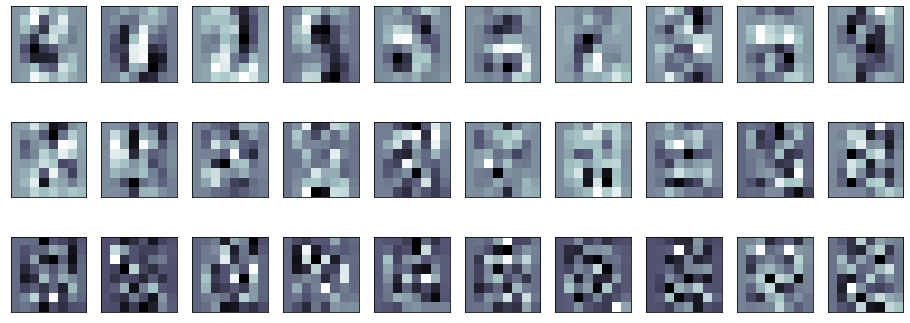

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(digits.images[0].shape),
              cmap=plt.cm.bone)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(1347, 50)


In [ ]:
print(X_test_pca.shape)

(450, 50)


In [ ]:
#with pcm
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

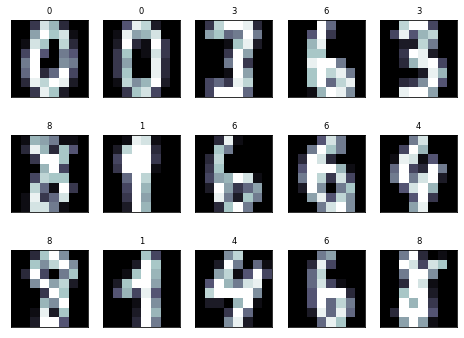

In [ ]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(digits.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

In [ ]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       0.94      0.96      0.95        48
           2       0.98      1.00      0.99        50
           3       1.00      0.94      0.97        51
           4       1.00      0.96      0.98        46
           5       0.97      0.97      0.97        31
           6       1.00      1.00      1.00        50
           7       0.97      1.00      0.99        38
           8       0.88      0.95      0.91        39
           9       0.93      0.91      0.92        45

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[52  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  1  1]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0  1 48  0  1  0  0  1  0]
 [ 0  0  0  0 44  0  0  0  1  1]
 [ 0  0  0  0  0 30  0  0  0  1]
 [ 0  0  0  0  0  0 50  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  2  0  0  0  0  0  0 37  0]
 [ 0  1  0  0  0  0  0  1  2 41]]


In [ ]:
#without pcm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train, y_train)

SVC(C=5.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

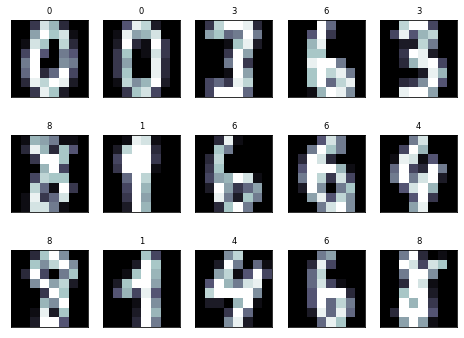

In [ ]:
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(digits.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

In [ ]:
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        50
           3       1.00      0.94      0.97        51
           4       1.00      1.00      1.00        46
           5       0.94      1.00      0.97        31
           6       1.00      1.00      1.00        50
           7       0.97      1.00      0.99        38
           8       0.97      1.00      0.99        39
           9       0.98      0.96      0.97        45

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[52  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  0  0]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0  0 48  0  1  0  0  1  1]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 31  0  0  0  0]
 [ 0  0  0  0  0  0 50  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  0  0  0  0  0  0  0 39  0]
 [ 0  0  0  0  0  1  0  1  0 43]]
